## LastFm social Network

In [4]:
import networkx as nx
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
lastfm = nx.read_edgelist("Data/lasftm_asia/lastfm_asia_edges.csv", delimiter=",")

In [ ]:
nx.transitivity(lastfm)

0.178622548153384

In [ ]:
nx.average_clustering(lastfm)

0.2194184243270858

In [ ]:
def plot_clustering(graph):
    x = np.array(list(nx.clustering(G).values()))
    return sns.ecdfplot(x)

In [ ]:
nx.average_clustering(lastfm)

0.2194184243270858

In [ ]:
fig = plot_clustering(lastfm)

In [6]:
degrees = np.array(list(dict(nx.degree(lastfm)).values()))

In [24]:
N = len(degrees)
vals, counts = np.unique(degrees, return_counts=True)
counts = counts/N

In [21]:
vals_log = np.log(vals)
counts_log = np.log(counts)

<AxesSubplot:>

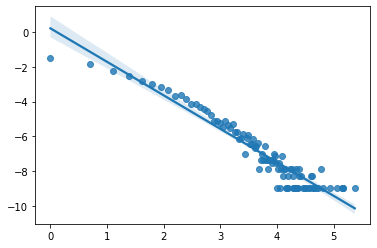

In [27]:
sns.regplot(x=vals_log, y=counts_log)

In [ ]:
nx.average_shortest_path_length(lastfm)

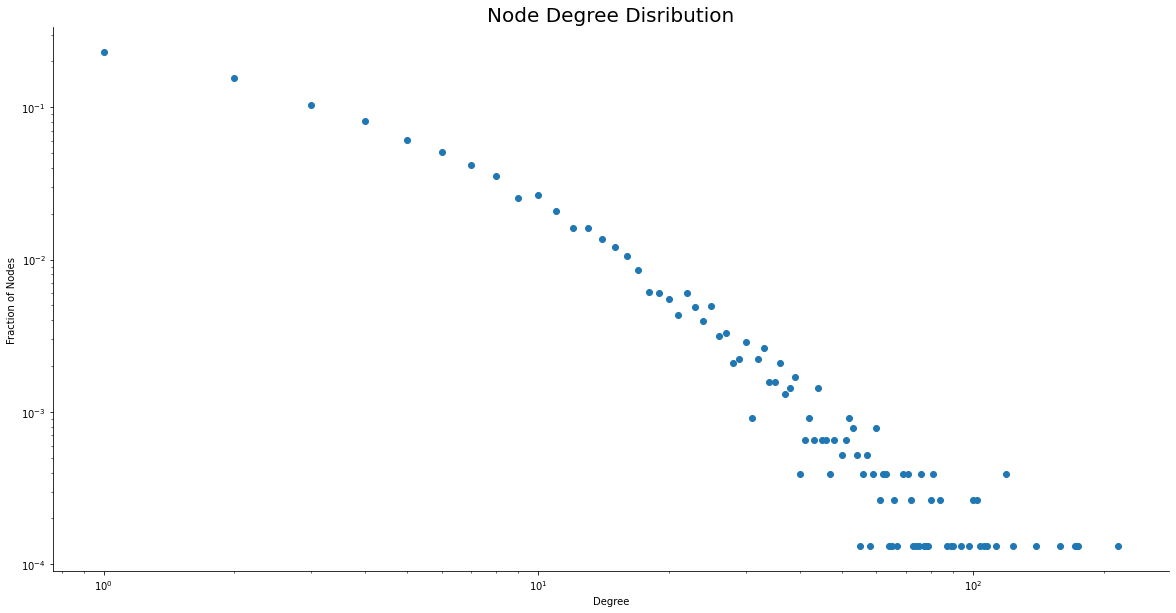

In [20]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(vals, counts, "o")

ax.set_title('Node Degree Disribution', fontsize=20)
ax.set_xlabel('Degree')
ax.set_ylabel('Fraction of Nodes')
ax.set(xscale="log", yscale="log")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

sns.histplot(degrees, ax=ax, )

ax.set_title('Node Degree Disribution', fontsize=20)
ax.set_xlabel('Degree')
ax.set(xscale="log", yscale="log")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [ ]:
x = np.linspace(min(degrees), max(degrees)+1, 100)

In [ ]:
pd.cut(degrees, bins=x, retbins=True)[0]

[NaN, (7.545, 9.727], (9.727, 11.909], (25.0, 27.182], (22.818, 25.0], ..., NaN, NaN, NaN, NaN, NaN]
Length: 7624
Categories (99, interval[float64, right]): [(1.0, 3.182] < (3.182, 5.364] < (5.364, 7.545] < (7.545, 9.727] ... (208.273, 210.455] < (210.455, 212.636] < (212.636, 214.818] < (214.818, 217.0]]

In [ ]:
nx.number_connected_components(lastfm)

1

In [ ]:
nx.minimum_edge_cut(karate)

{(11, 0)}

In [ ]:
nx.node_connectivity(karate)

1

In [ ]:
nx.edge_connectivity(karate)

1

In [ ]:
nx.average_shortest_path_length(G)

In [ ]:
nx.eccentricity(G)

In [ ]:
nx.diameter(G)

In [ ]:
nx.betweenness_centrality(lastfm, k=10)

In [ ]:
target=pd.read_csv("Data/lasftm_asia/lastfm_asia_target.csv")

In [ ]:
nx.set_node_attributes(lastfm, {str(i["id"]):i["target"] for i in target.to_dict("records")}, name="target")

In [ ]:
lastfm.nodes(data=True)

In [ ]:
lastfm_df = pd.DataFrame(lastfm.nodes(data="target"), columns=["person", "target"])

In [ ]:
lastfm_df